In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the dataset
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#checking dimensions of the dataset
df.shape

(39717, 111)

In [9]:
#checking columns with null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<b>It is observed that there are a lot of columns with all null values. Let's first remove them.</b>

In [12]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<b>There are now columns which are single valued.</b>
    They cannot contribute to our analysis in any way so removing them.

In [15]:
#columns with single value
print(df[['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','application_type','pub_rec_bankruptcies','tax_liens','delinq_amnt']])

      pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0              n                   f                         0.0            1   
1              n                   f                         0.0            1   
2              n                   f                         0.0            1   
3              n                   f                         0.0            1   
4              n                   f                         0.0            1   
...          ...                 ...                         ...          ...   
39712          n                   f                         NaN            1   
39713          n                   f                         NaN            1   
39714          n                   f                         NaN            1   
39715          n                   f                         NaN            1   
39716          n                   f                         NaN            1   

       acc_now_delinq appli

In [17]:
#deleting the same columns
df.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','application_type','pub_rec_bankruptcies','tax_liens','delinq_amnt'], axis=1, inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns out of which some correspond to the post approval of loan
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
- The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them. 
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [19]:
#dropping non relevant columns
df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
df.shape

(39717, 21)

In [21]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### the goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans
- we cannot make anything up for the current loans
- to exclude that data, removing the records with current loan status

In [24]:
df=df[df.loan_status!='Current']
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [27]:
# Calculate the percentage of missing values for each column in the DataFrame
(df.isna().sum()/len(df.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

### Handling missing values
- columns with missing values are 'emp_length' and 'revol_until'
- so before doing that, lets see what kind of data each column has


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null  obje

In [32]:
print('Mode : ' + df.emp_length.mode()[0])
df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.-
This means that we can safely assign the value of mode to the null values in the column.-
Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [35]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace=True)
df.emp_length.isna().sum()

0

### Standardizing the data
- "revol_util" column although described as an object column, it has continous values.
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [38]:
#lets see the values first
df[['revol_util','int_rate','emp_length']].head()

,revol_util,int_rate,emp_length
0,83.70%,10.65%,10+ years
1,9.40%,15.27%,< 1 year
2,98.50%,15.96%,10+ years
3,21%,13.49%,10+ years
5,28.30%,7.90%,3 years


In [40]:
#converting the revol_until cols values to numeric
df['revol_util'] = pd.to_numeric(df['revol_util'].apply(lambda x: str(x).split('%')[0] if isinstance(x, str) else x))

In [42]:
#converting string values to numeric
df.int_rate=pd.to_numeric(df.int_rate.apply(lambda x: x.split('%')[0]))

In [44]:
#converting emp_length col values
df.emp_length=pd.to_numeric(df.emp_length.apply(lambda x: 0 if '<' in x else (x.split('+')[0]) if '+' in x else x.split()[0]))

In [46]:
#lets see the values now
df[['revol_util','int_rate','emp_length']].head()

,revol_util,int_rate,emp_length
0,83.7,10.65,10
1,9.4,15.27,0
2,98.5,15.96,10
3,21.0,13.49,10
5,28.3,7.90,3


In [51]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


### Outlier treatment

<Axes: >

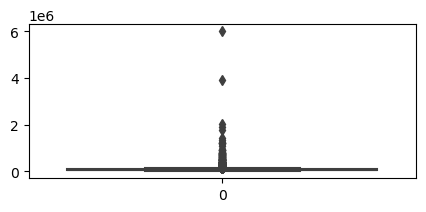

In [56]:
plt.figure(figsize=(5,2))
sns.boxplot(df['annual_inc'])

### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [54]:
quant_info = df.annual_inc.quantile([0.5,0.75,0.95,0.97,0.98,0.99])
quant_info

0.50     58868.0
0.75     82000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

<Axes: >

<Figure size 500x400 with 0 Axes>

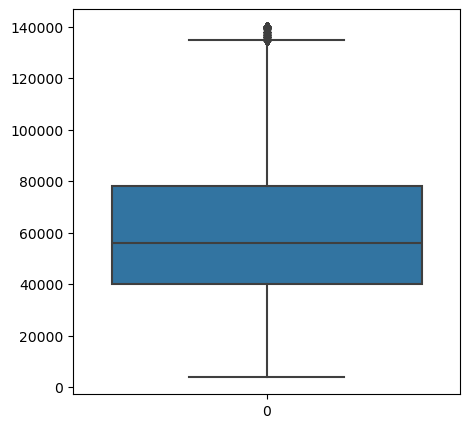

In [58]:
#taking values below 96 quantile

plt.figure(figsize=(5,4))
annual_inc_95=df['annual_inc'].quantile(0.95)
df = df[df['annual_inc']<=annual_inc_95]

plt.figure(figsize=(5,5))
sns.boxplot(df.annual_inc)

### Now the "annual_inc" data looks good and proceeding next.-
Let's analyze other numerical variables which could possibly have outliers.-
d, i
loan_a, nt
funded_amnt_inv

<Axes: >

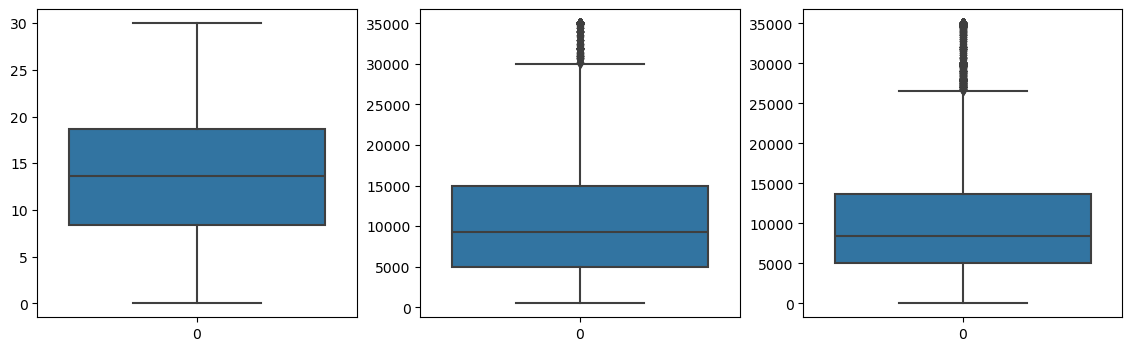

In [60]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(df.dti)

plt.subplot(1, 3, 2)
sns.boxplot(df.loan_amnt)

plt.subplot(1, 3, 3)
sns.boxplot(df.funded_amnt_inv)

In [62]:
#seeing the outliers of loan_amnt
df.loan_amnt.quantile([0.75 , 0.90, 0.95, 0.975, 0.98, 0.99,1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [64]:
df.funded_amnt_inv.quantile([0.5, 0.75, 0.90, 0.95, 0.975, 0.98, 0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers / extreme values for these above columns.

### Visualizing Categorical Data
- As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable- 
We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<Axes: xlabel='loan_status', ylabel='count'>

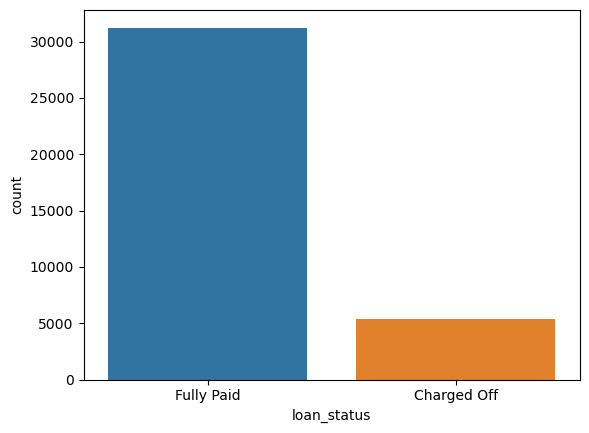

In [68]:
sns.countplot(x='loan_status', data = df)

In [70]:
df.sub_grade.head()

0    B2
1    C4
2    C5
3    C1
5    A4
Name: sub_grade, dtype: object

In [72]:
df.sub_grade=pd.to_numeric(df.sub_grade.apply(lambda x: x[-1]))
df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

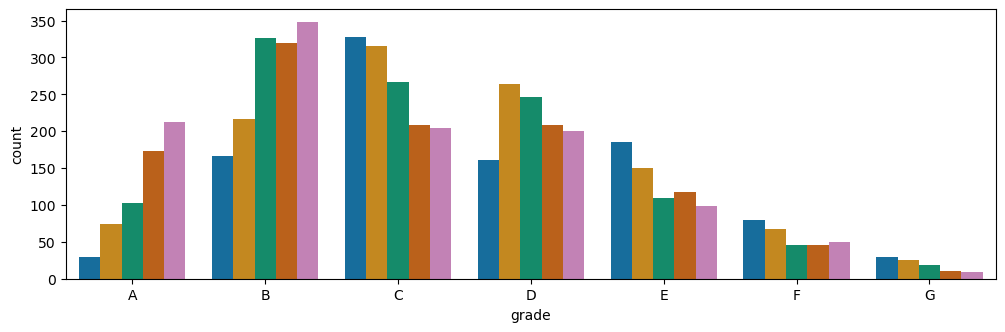

In [79]:
# Plot 1
plt.figure(figsize=(12, 3.5))
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade', palette='colorblind', data=df[df.loan_status == 'Charged Off'])
plt.title('Count of Charged Off Loans by Grade and Sub-Grade')
plt.show()

<Axes: xlabel='grade', ylabel='count'>

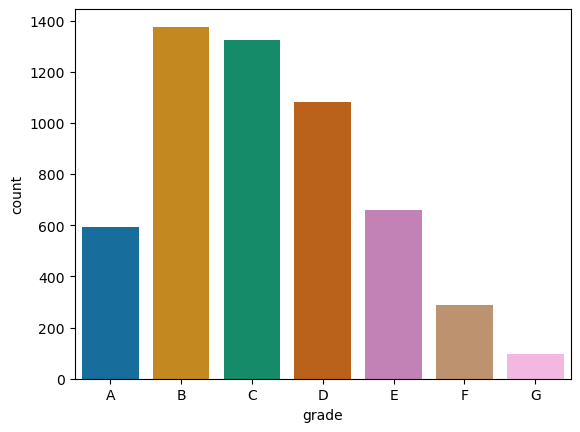

In [83]:
sns.countplot(x='grade', order=['A','B','C','D','E','F', 'G'], data=df[df.loan_status == 'Charged Off'])

In [85]:
#checking unique values for home ownership
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'


In [88]:
# replacing none with others
df['home_ownership'].replace(to_replace=['NONE'], value='OTHER', inplace=True)
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

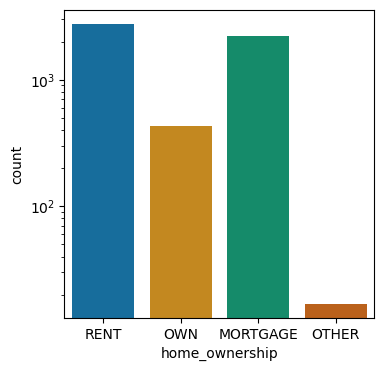

In [90]:
fig, ax=plt.subplots(figsize=(4,4))
ax.set(yscale='log')
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])

### Analyzing Purpose


<Axes: xlabel='count', ylabel='purpose'>

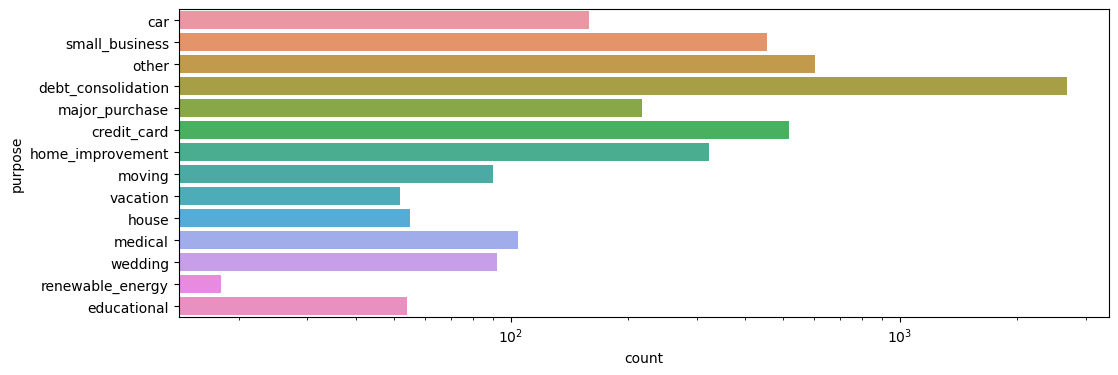

In [92]:
fig, ax=plt.subplots(figsize=(12,4))
ax.set(xscale='log')
sns.countplot(y='purpose', data=df[df.loan_status == 'Charged Off'])

### Creating bins for some numerical variable to make them categorical


In [95]:
#creating bins for int_rate,open_acc,revol_util,total_acc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5, precision=0, labels=['5%-9%','9%-13%', '13%-17%', '17%-21%', '21%-24%'])
df['open_acc_groups'] = pd.cut(df['open_acc'], bins=5, precision=0, labels=['2-10', '10-19', '19-27', '27-36', '36-44'])
df['revol_util_groups'] = pd.cut(df['revol_util'], bins=5, precision=0, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5, precision=0, labels=['2-20', '20-37', '37-55', '55-74', '74-90'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5, precision=0, labels=['3k-31k', '31k-58k', '58k-85k', '85k-112k', '112k-140k'])
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


### Analyzing interest rate wrt the interest rate bins created

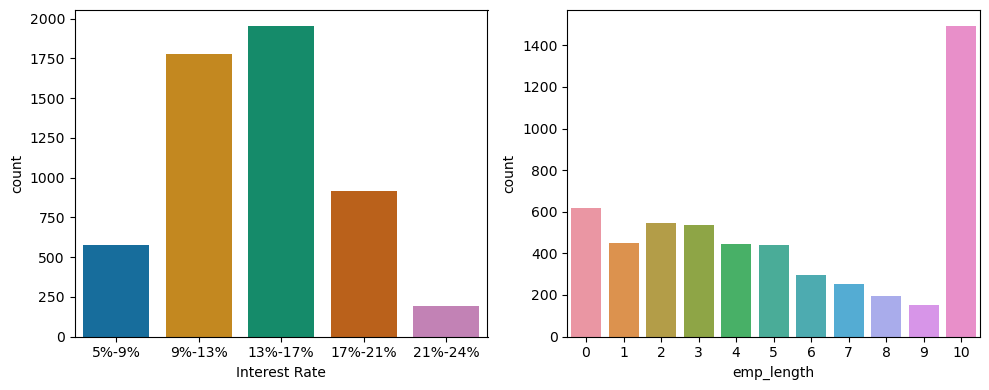

In [97]:
plt.figure(figsize=(10, 4))  # Just set the figure size

plt.subplot(121)
sns.countplot(x='int_rate_groups', data=df[df.loan_status=='Charged Off'])
plt.xlabel('Interest Rate')

plt.subplot(122)
sns.countplot(x='emp_length', data=df[df.loan_status=='Charged Off'])
plt.xlabel('emp_length')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Similarly analyzing open_acc,revol_util,total_acc,annual_inc


<Axes: xlabel='annual_inc_groups', ylabel='count'>

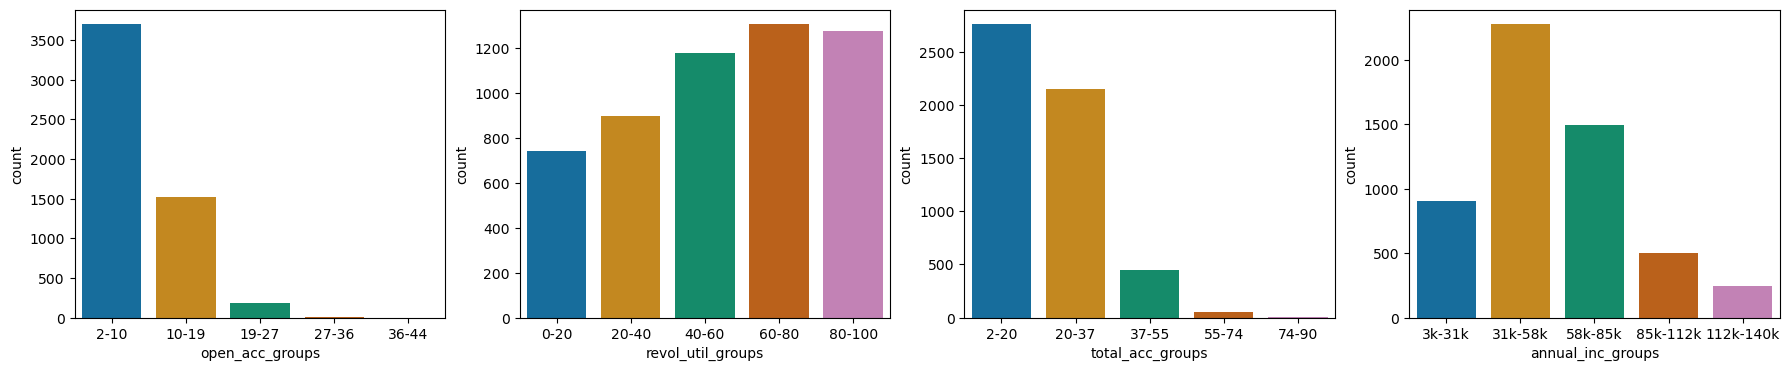

In [99]:
plt.figure(figsize=(22, 4))  # Create the figure and axes

plt.subplot(141)
ax.set_yscale('log')  # Set y-axis to logarithmic scale
sns.countplot(x='open_acc_groups', data=df[df.loan_status == 'Charged Off'])  # Use the ax object

plt.subplot(142)
ax.set_yscale('log')  # Set y-axis to logarithmic scale
sns.countplot(x='revol_util_groups', data=df[df.loan_status == 'Charged Off'])  # Use the ax object

plt.subplot(143)
sns.countplot(x='total_acc_groups', data=df[df.loan_status=='Charged Off'])

plt.subplot(144)
sns.countplot(x='annual_inc_groups', data=df[df.loan_status=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

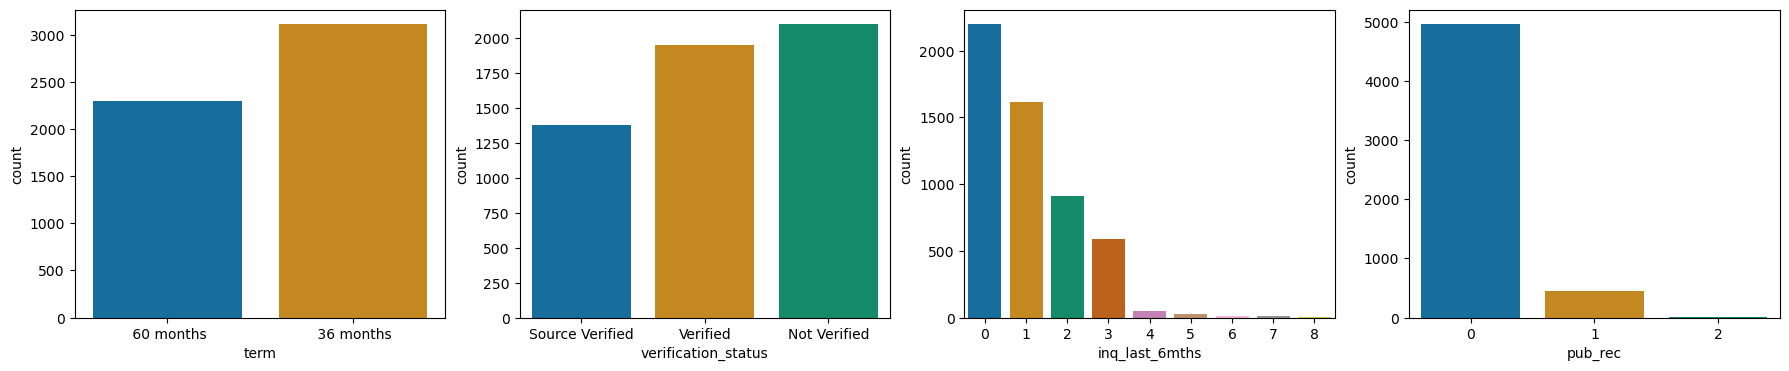

In [101]:
plt.figure(figsize=(22,4))

plt.subplot(141)
sns.countplot(x='term', data=df[df.loan_status=='Charged Off'])

plt.subplot(142)
sns.countplot(x='verification_status', data=df[df.loan_status=='Charged Off'])

plt.subplot(143)
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=df[df.loan_status=='Charged Off'])

plt.subplot(144)
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=df[df.loan_status == 'Charged Off'])

### Analyzing by issued month and year


In [104]:
print(df.issue_d.head())
# Extracting month and year
df_mnth_yr = df['issue_d'].str.partition('-', True)
df['issue_month'] = df_mnth_yr[0]
df['issue_yr'] = '20'+ df_mnth_yr[2]
print(df.iloc[:, -2:].head())  # Prints the last two columns


0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object
  issue_month issue_yr
0         Dec     2011
1         Dec     2011
2         Dec     2011
3         Dec     2011
5         Dec     2011


<Axes: xlabel='issue_yr', ylabel='count'>

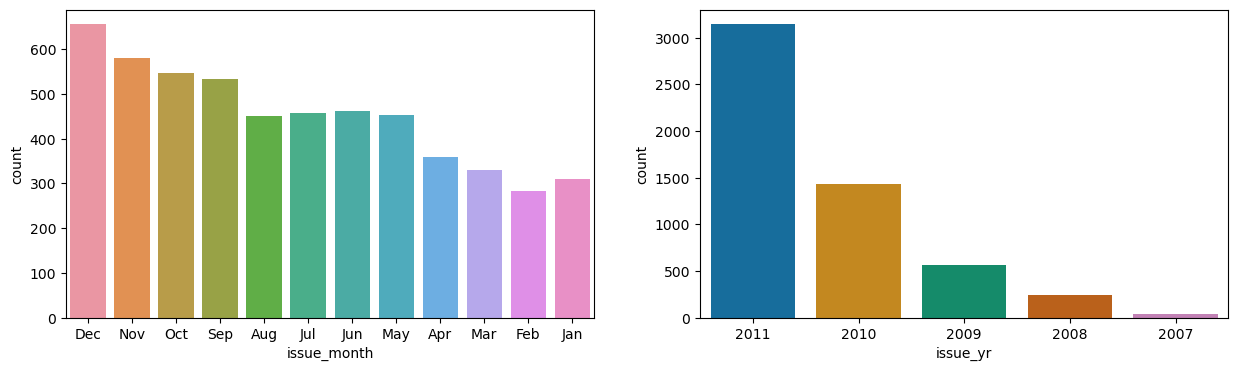

In [105]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.countplot(x='issue_month', data=df[df.loan_status == 'Charged Off'])

plt.subplot(122)
sns.countplot(x='issue_yr', data=df[df.loan_status=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

### Analyzing installment,dti, loan_amnt


In [109]:
df['installment_groups'] = pd.cut(df.installment, bins=10, precision=0, labels=['14-145', '145-274', '274-403', '403-531', '531-660', '660-789', '789-918', '918-1047', '1047-1176', '1176-1305'])
df['funded_amnt_inv_groups'] = pd.cut(df['funded_amnt_inv'], bins=7, labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k','30k-35k'])
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7, precision=0, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

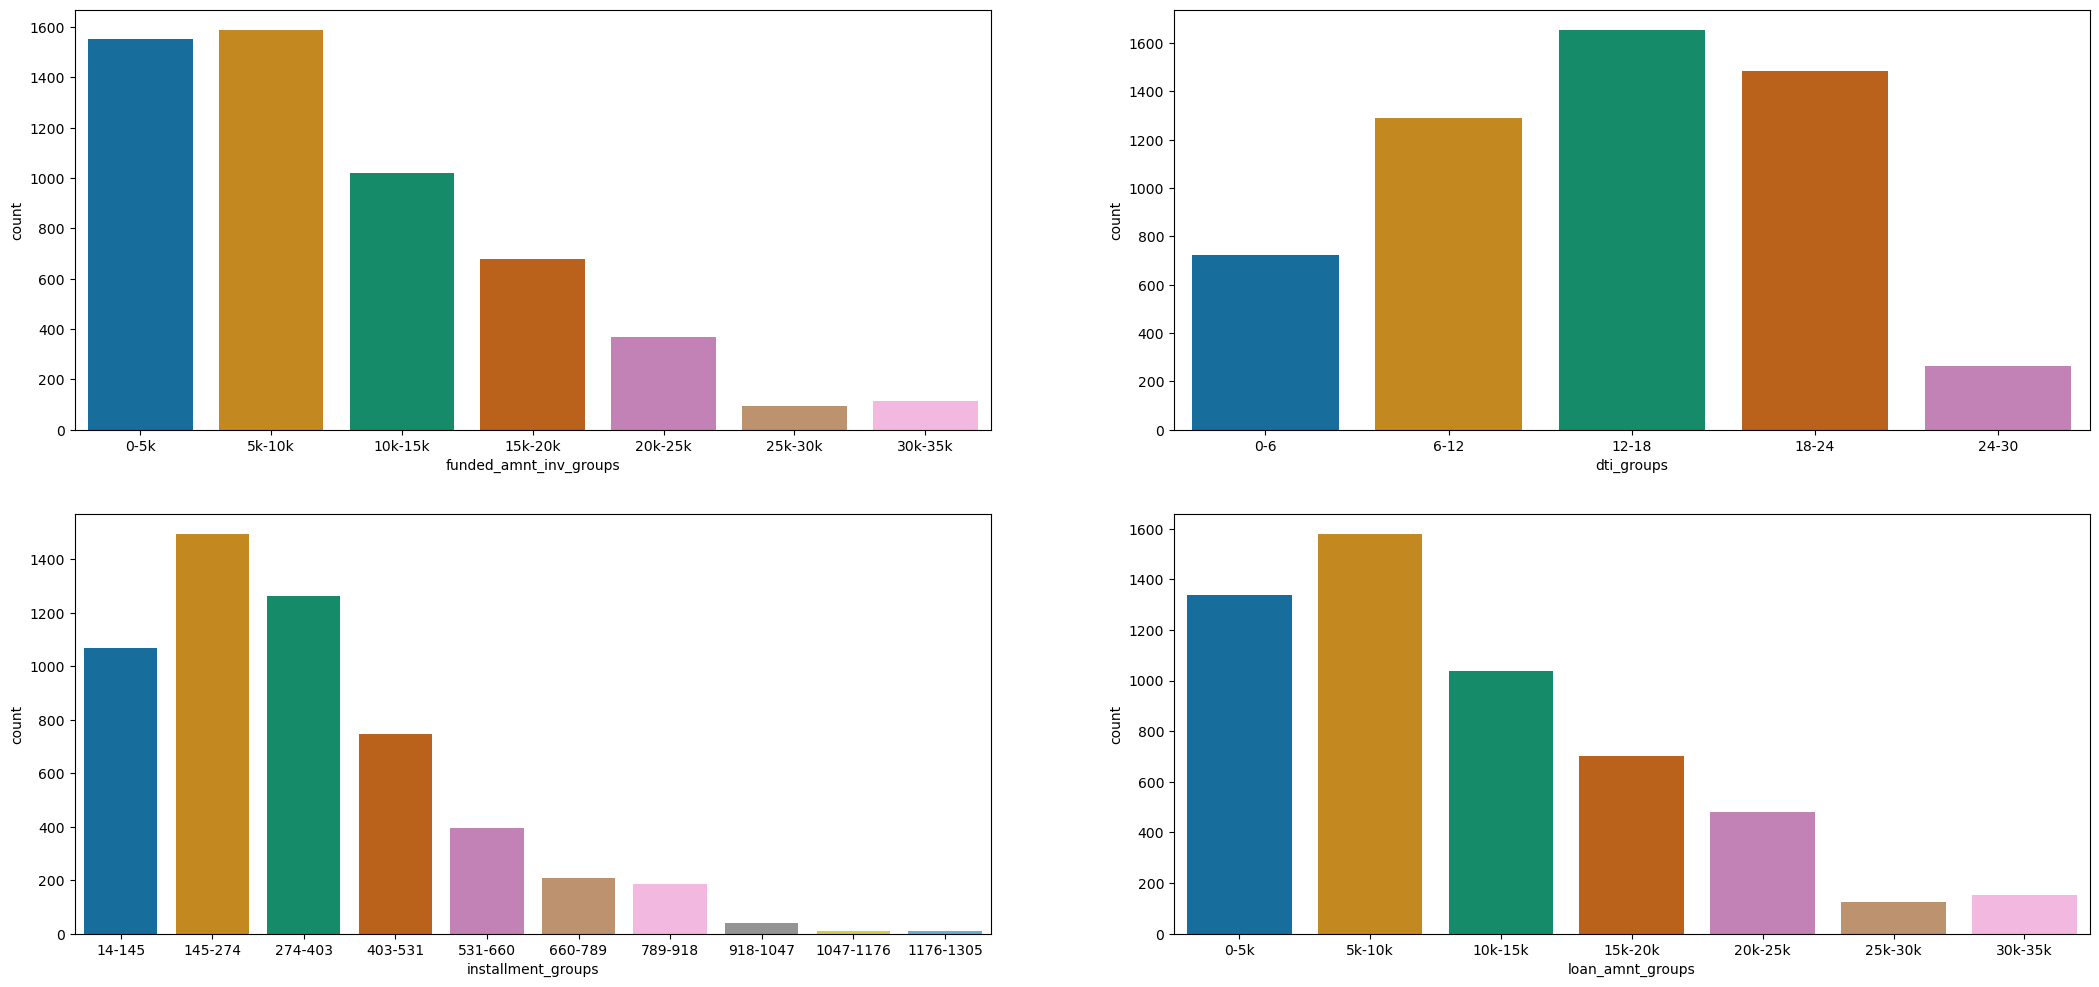

In [110]:
plt.figure(figsize=(26,12))

plt.subplot(221)
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_groups', data=df[df.loan_status=='Charged Off'])

plt.subplot(222)
ax.set_yscale('log')
sns.countplot(x='dti_groups', data=df[df.loan_status=='Charged Off'])

plt.subplot(223)
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=df[df.loan_status=='Charged Off'])

plt.subplot(224)
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=df[df.loan_status=='Charged Off'])

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.
e of 'B5' level.e of 'B5' level.

### Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting. 
- The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

## Analysing annual income with other columns for more insights 

Text(0.5, 1.0, 'Annual Income vs Home Ownership')

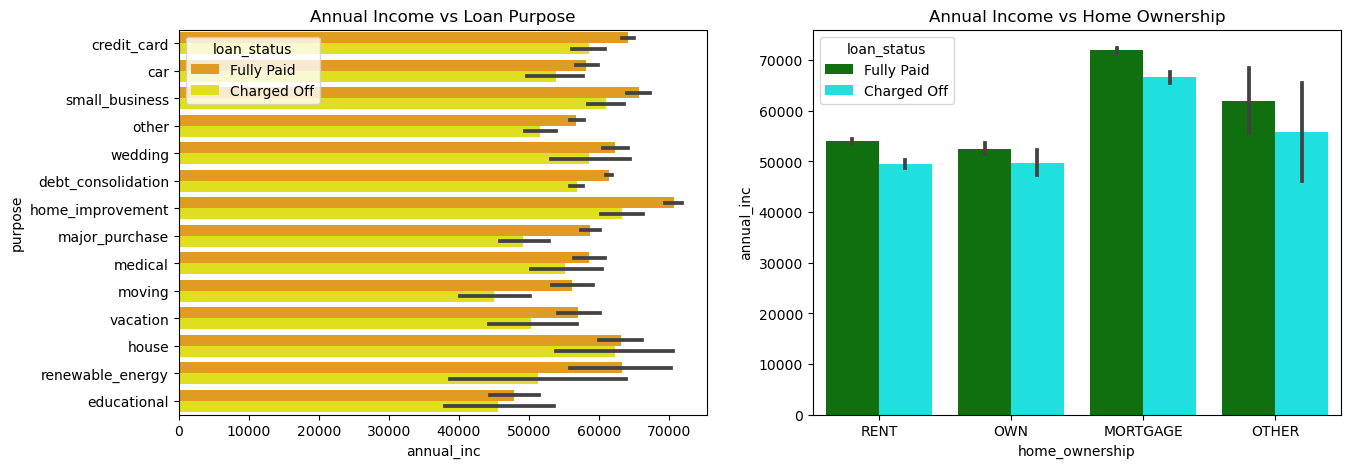

In [114]:
plt.figure(figsize=(15,5))

# First subplot: Annual income vs loan purpose
plt.subplot(121)  # 1 row, 2 columns, position 1
sns.barplot(data=df, x='annual_inc', y='purpose', hue='loan_status', palette=['orange', 'yellow'])
plt.title('Annual Income vs Loan Purpose')

# Second subplot: Annual income vs home ownership
plt.subplot(122)  # 1 row, 2 columns, position 2
sns.barplot(data=df, x='home_ownership', y='annual_inc', hue='loan_status', palette=['green','cyan'])
plt.title('Annual Income vs Home Ownership')

### Annual Income vs Loan amount

Text(0.5, 1.0, 'Annual Income by Interest Rate Groups and Loan Status')

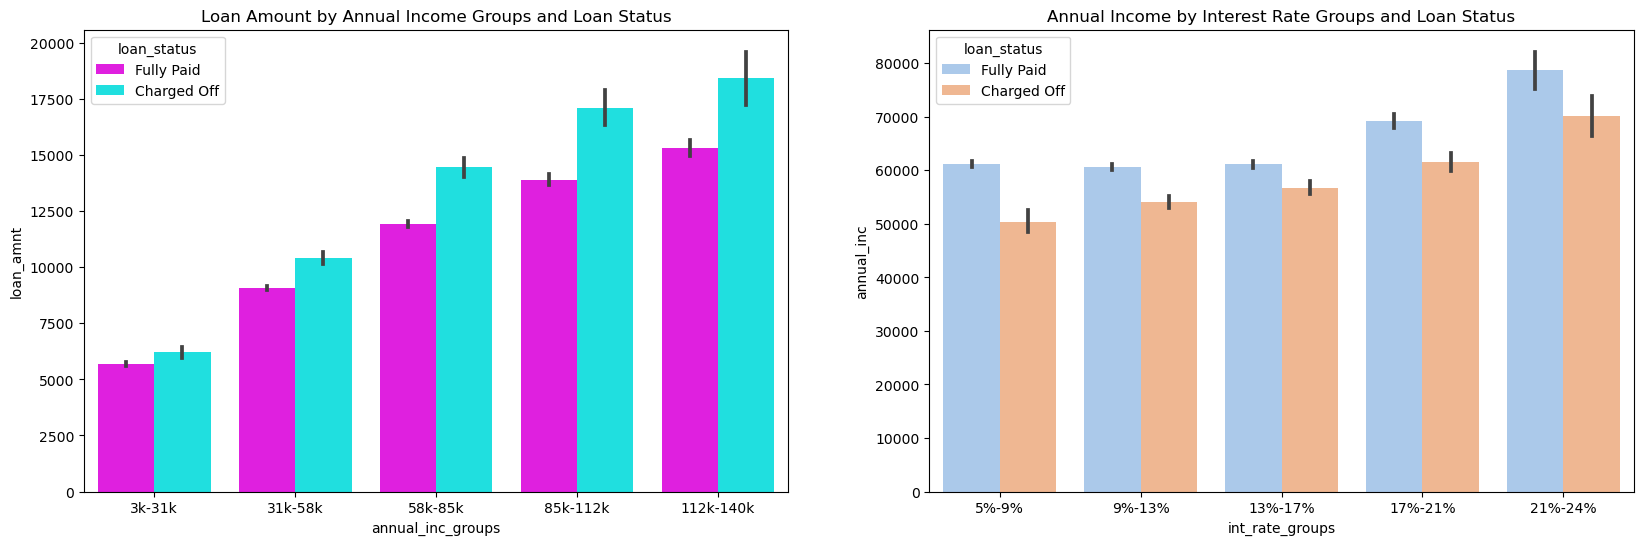

In [131]:
plt.figure(figsize=(20,6))

# First subplot: Annual Income Groups vs Loan Amount
plt.subplot(121)
sns.barplot(data=df, x='annual_inc_groups', y='loan_amnt', hue='loan_status', palette=['magenta', 'cyan'])
plt.title('Loan Amount by Annual Income Groups and Loan Status')

# Second subplot: Interest Rate Groups vs Annual Income
plt.subplot(122)
sns.barplot(data=df, x='int_rate_groups', y='annual_inc', hue='loan_status', palette='pastel')
plt.title('Annual Income by Interest Rate Groups and Loan Status')

## Analysing loan_amount with other columns for more insights 

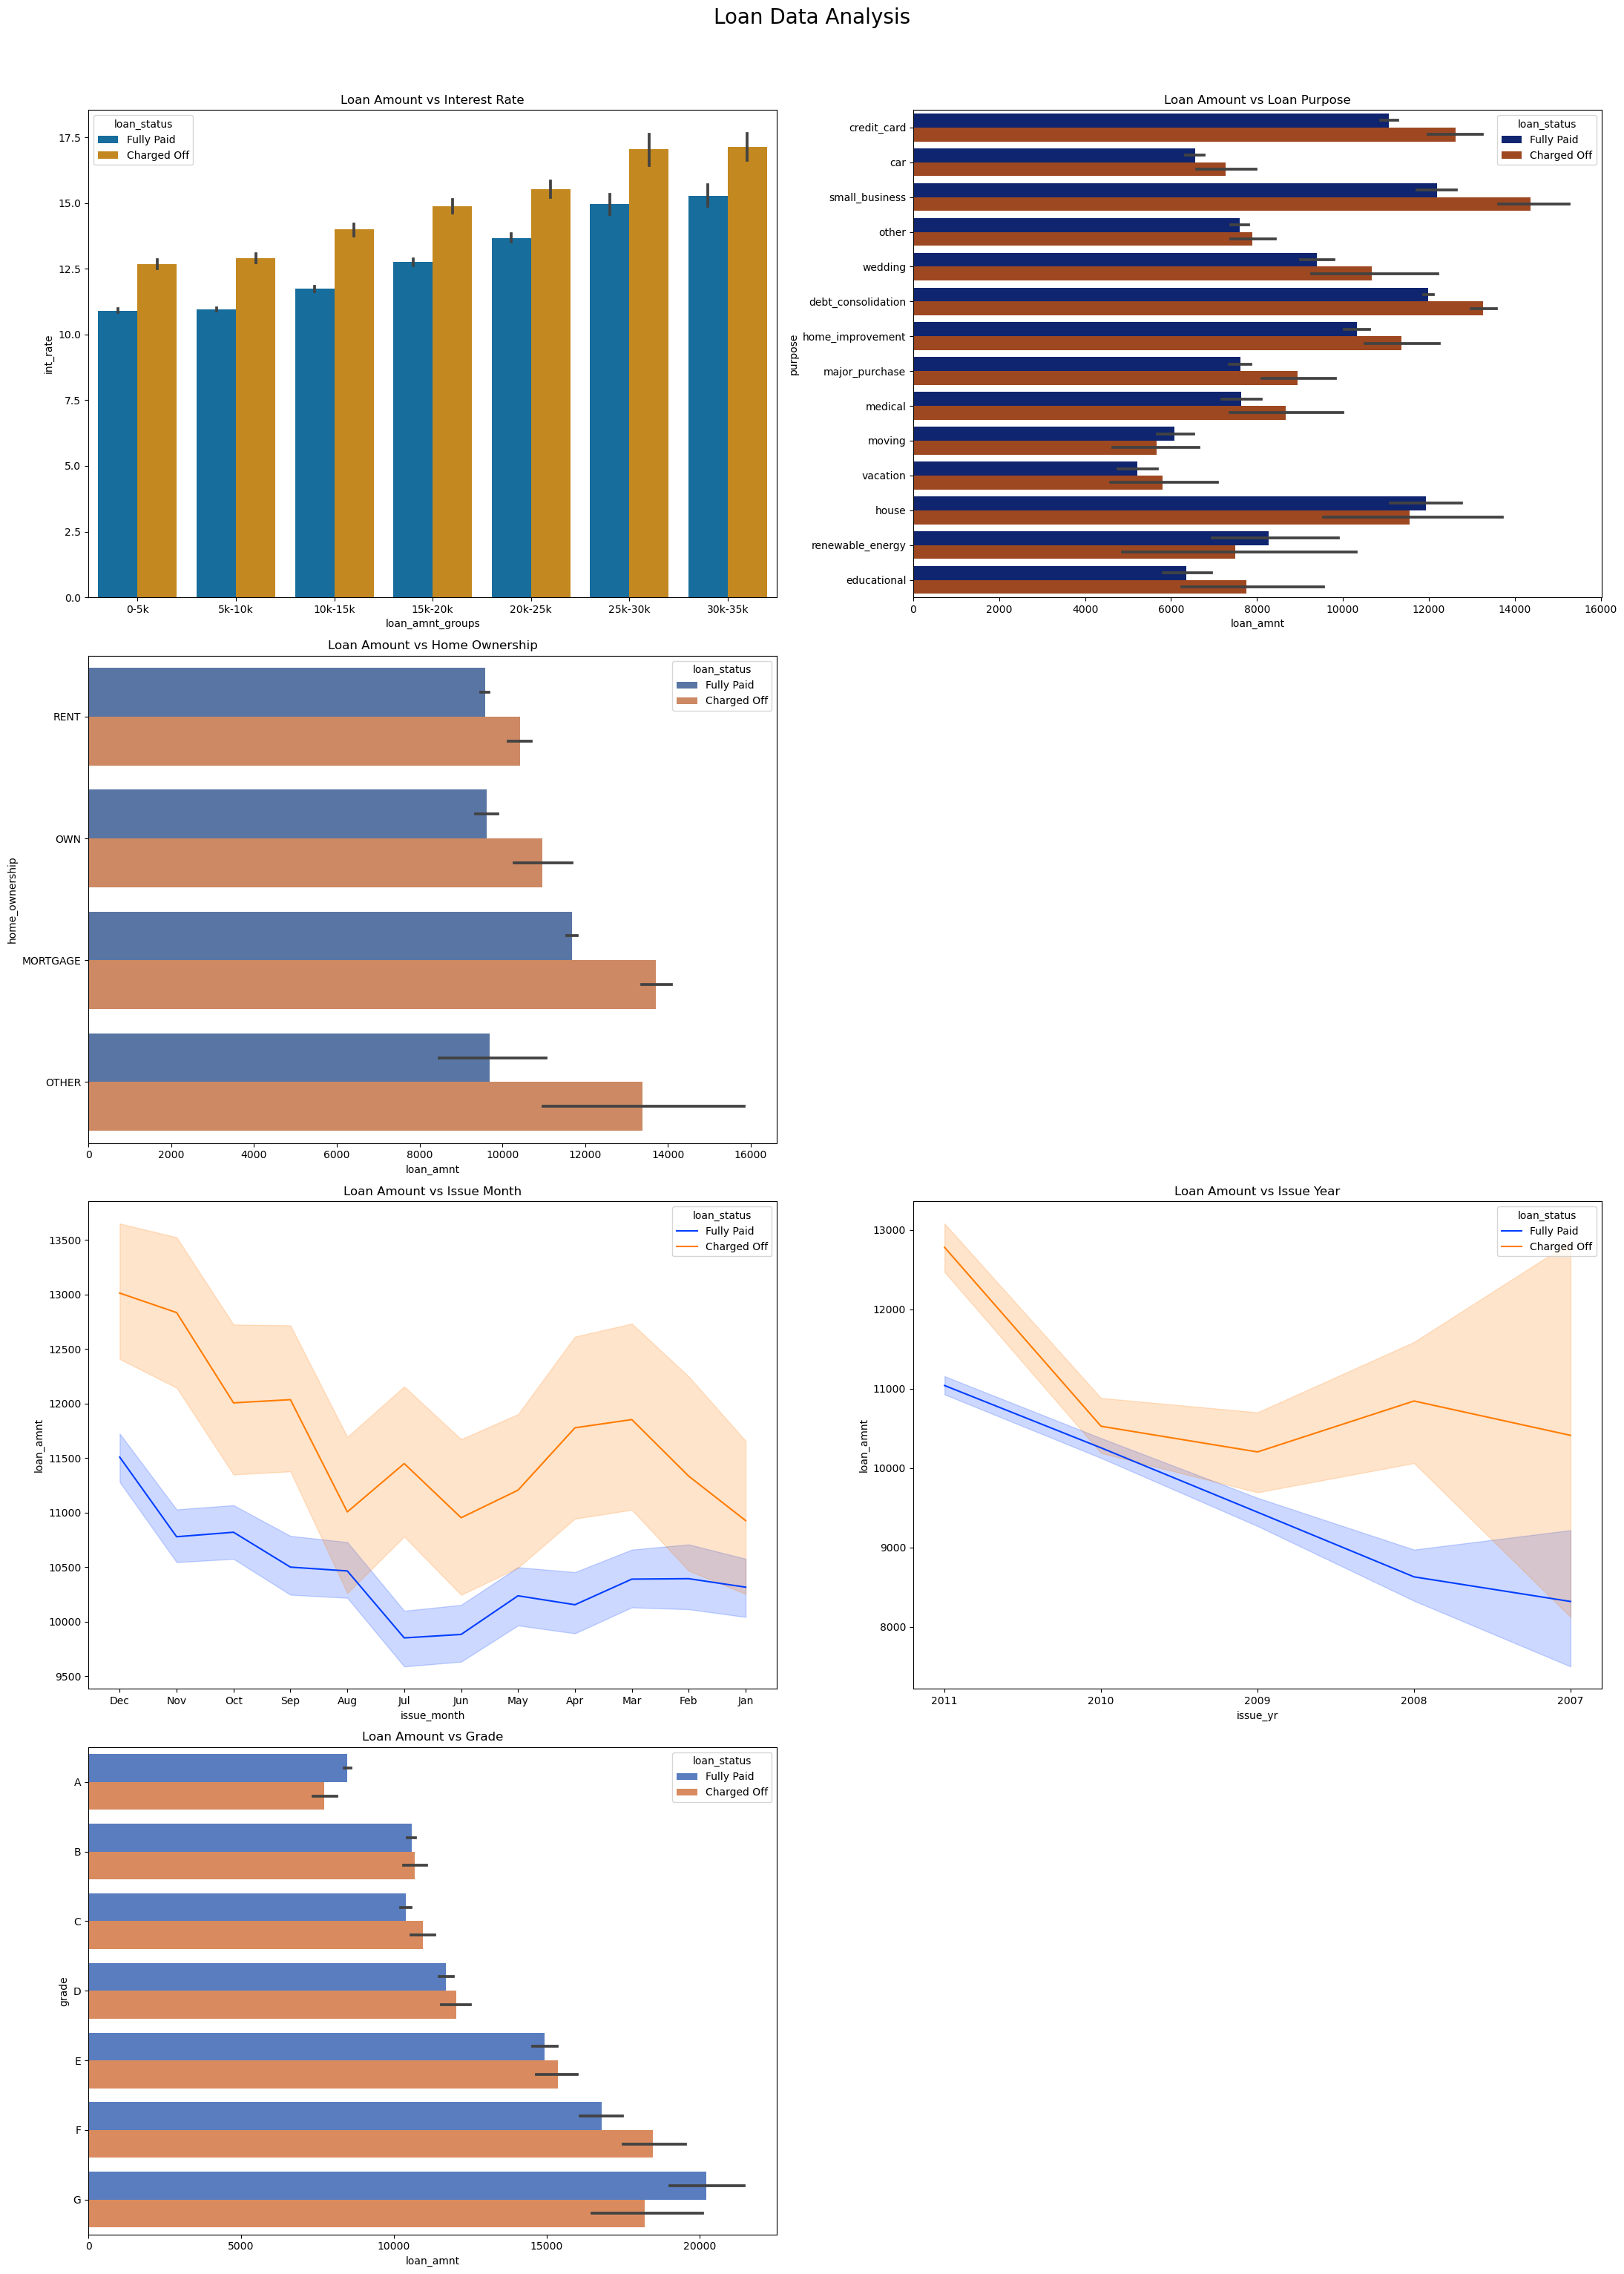

In [119]:
plt.figure(figsize=(22, 30))

# 1. Loan Amount vs Interest Rate
plt.subplot(421)
sns.barplot(data=df, x='loan_amnt_groups', y='int_rate', hue='loan_status', palette='colorblind')
plt.title('Loan Amount vs Interest Rate')

# 2. Loan Amount vs Loan Purpose
plt.subplot(422)
sns.barplot(data=df, x='loan_amnt', y='purpose', hue='loan_status', palette='dark')
plt.title('Loan Amount vs Loan Purpose')

# 3. Loan Amount vs Home Ownership
plt.subplot(423)
sns.barplot(data=df, x='loan_amnt', y='home_ownership', hue='loan_status', palette='deep')
plt.title('Loan Amount vs Home Ownership')

# 4. Loan Amount vs Month Issued
plt.subplot(425)
sns.lineplot(data=df, x='issue_month', y='loan_amnt', hue='loan_status', palette='bright')
plt.title('Loan Amount vs Issue Month')

# 5. Loan Amount vs Year Issued
plt.subplot(426)
sns.lineplot(data=df, x='issue_yr', y='loan_amnt', hue='loan_status', palette='bright')
plt.title('Loan Amount vs Issue Year')

# 6. Loan Amount vs Grade
plt.subplot(427)
sns.barplot(data=df, x='loan_amnt', y='grade', hue='loan_status', palette='muted', order=['A','B','C','D','E','F','G'])
plt.title('Loan Amount vs Grade')

# Add an overall title for the entire figure
plt.suptitle('Loan Data Analysis', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

<Axes: xlabel='int_rate', ylabel='grade'>

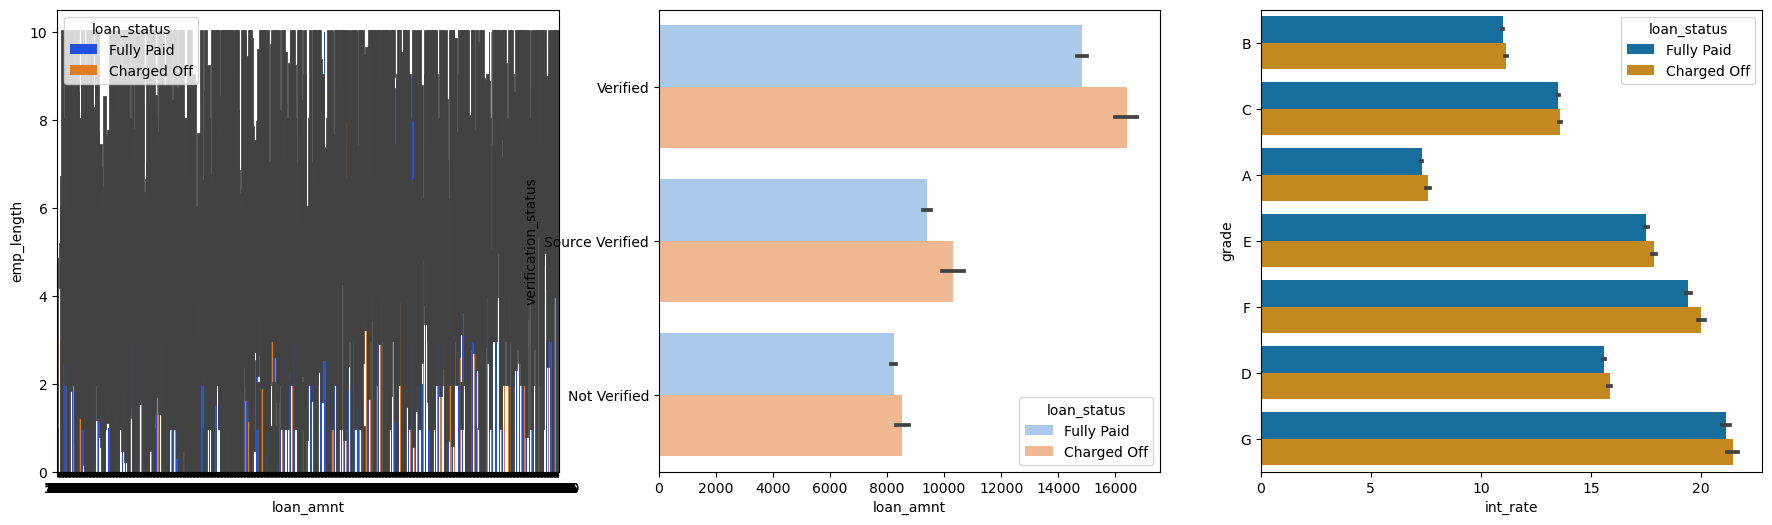

In [159]:
plt.figure(figsize=(22,6))

plt.subplot(131)
sns.barplot(data=df, x='loan_amnt', y='emp_length', hue='loan_status', palette='bright')

plt.subplot(132)
sns.barplot(data=df, x='loan_amnt', y='verification_status', hue='loan_status', palette='pastel')

# grade vs interest rate
plt.subplot(133)
sns.barplot(data=df, x='int_rate', y='grade', hue='loan_status', palette='colorblind')

### Employees with longer working history got the loan approved for a higher amount. 
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

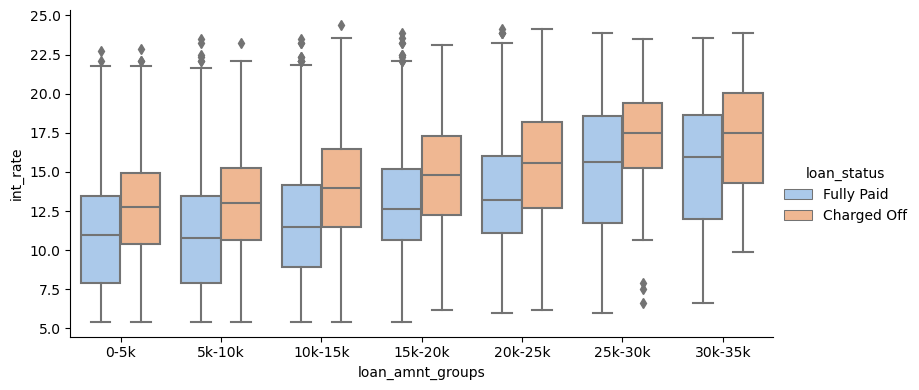

In [185]:
sns.catplot(data=df, y='int_rate', x='loan_amnt_groups', hue='loan_status', palette='pastel', kind='box', height=4, aspect=2)

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

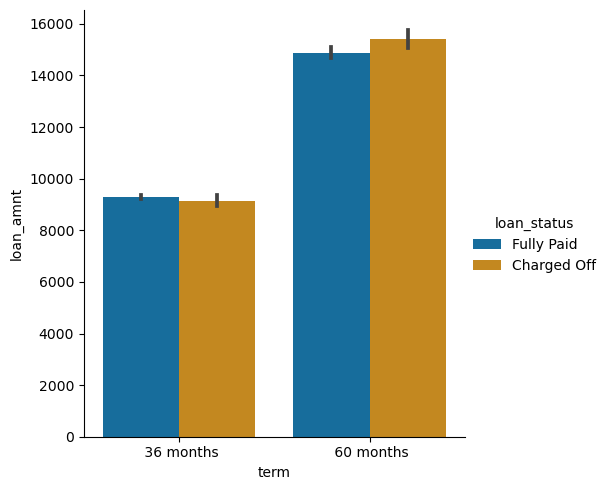

In [189]:
sns.catplot(data=df, x='term', y='loan_amnt', hue='loan_status', kind='bar')

### Applicants who applied and defaulted have no significant difference in loan_amounts.- 
Which means that applicants applying for long term has applied for more loan.

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%